In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [154]:
import warnings
warnings.filterwarnings("ignore")

In [155]:
credit_df = pd.read_csv('credit_risk_dataset.csv')
credit_df.shape

(32581, 12)

In [156]:
credit_df.head(5)

person_age  person_income person_home_ownership  person_emp_length  \
0          22          59000                  RENT              123.0   
1          21           9600                   OWN                5.0   
2          25           9600              MORTGAGE                1.0   
3          23          65500                  RENT                4.0   
4          24          54400                  RENT                8.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0    PERSONAL          D      35000          16.02            1   
1   EDUCATION          B       1000          11.14            0   
2     MEDICAL          C       5500          12.87            1   
3     MEDICAL          C      35000          15.23            1   
4     MEDICAL          C      35000          14.27            1   

   loan_percent_income cb_person_default_on_file  cb_person_cred_hist_length  
0                 0.59                         Y                           3  
1                 0.10                         N                           2  
2                 0.57                         N                           3  
3                 0.53                         N                           2  
4                 0.55                         Y                           4

In [157]:
credit_df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

In [158]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


### Check for null values 

In [159]:
credit_df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [160]:
credit_df.dropna(axis=0,inplace=True)

In [161]:
credit_df.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [162]:
credit_df['loan_status'].value_counts()

0    22435
1     6203
Name: loan_status, dtype: int64

In [163]:
credit_df = credit_df.drop(credit_df[credit_df['person_age'] > 80].index, axis=0)

### Studying Outliers 

In [164]:
credit_df.describe()

person_age  person_income  person_emp_length     loan_amnt  \
count  28633.000000   2.863300e+04        28633.00000  28633.000000   
mean      27.709741   6.642964e+04            4.78867   9656.565851   
std        6.163130   5.155164e+04            4.15470   6329.755492   
min       20.000000   4.000000e+03            0.00000    500.000000   
25%       23.000000   3.945600e+04            2.00000   5000.000000   
50%       26.000000   5.590000e+04            4.00000   8000.000000   
75%       30.000000   8.000000e+04            7.00000  12500.000000   
max       80.000000   2.039784e+06          123.00000  35000.000000   

       loan_int_rate   loan_status  loan_percent_income  \
count   28633.000000  28633.000000         28633.000000   
mean       11.039841      0.216638             0.169503   
std         3.229529      0.411961             0.106389   
min         5.420000      0.000000             0.000000   
25%         7.900000      0.000000             0.090000   
50%        10.990000      0.000000             0.150000   
75%        13.480000      0.000000             0.230000   
max        23.220000      1.000000             0.830000   

       cb_person_cred_hist_length  
count                28633.000000  
mean                     5.792757  
std                      4.035676  
min                      2.000000  
25%                      3.000000  
50%                      4.000000  
75%                      8.000000  
max                     30.000000

Two ambiguities can be identified:
1) Person's age is 144.
2) Person's employment length(in years) 123.

In [165]:
credit_df.reset_index(inplace = True)

<BarContainer object of 54 artists>

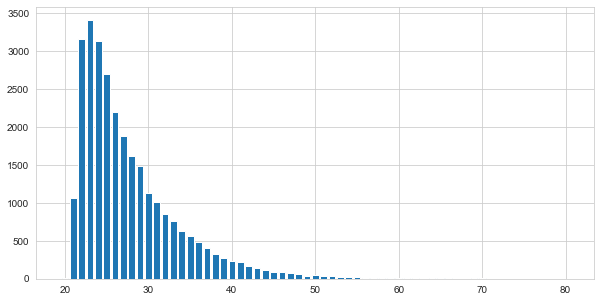

In [166]:
import matplotlib.pyplot as plt 
v = credit_df['person_age'].value_counts().values
h = credit_df['person_age'].value_counts().index
fig = plt.figure(figsize = (10, 5))
plt.bar(h, v)
# after 80 it is rare

# Pair Plot

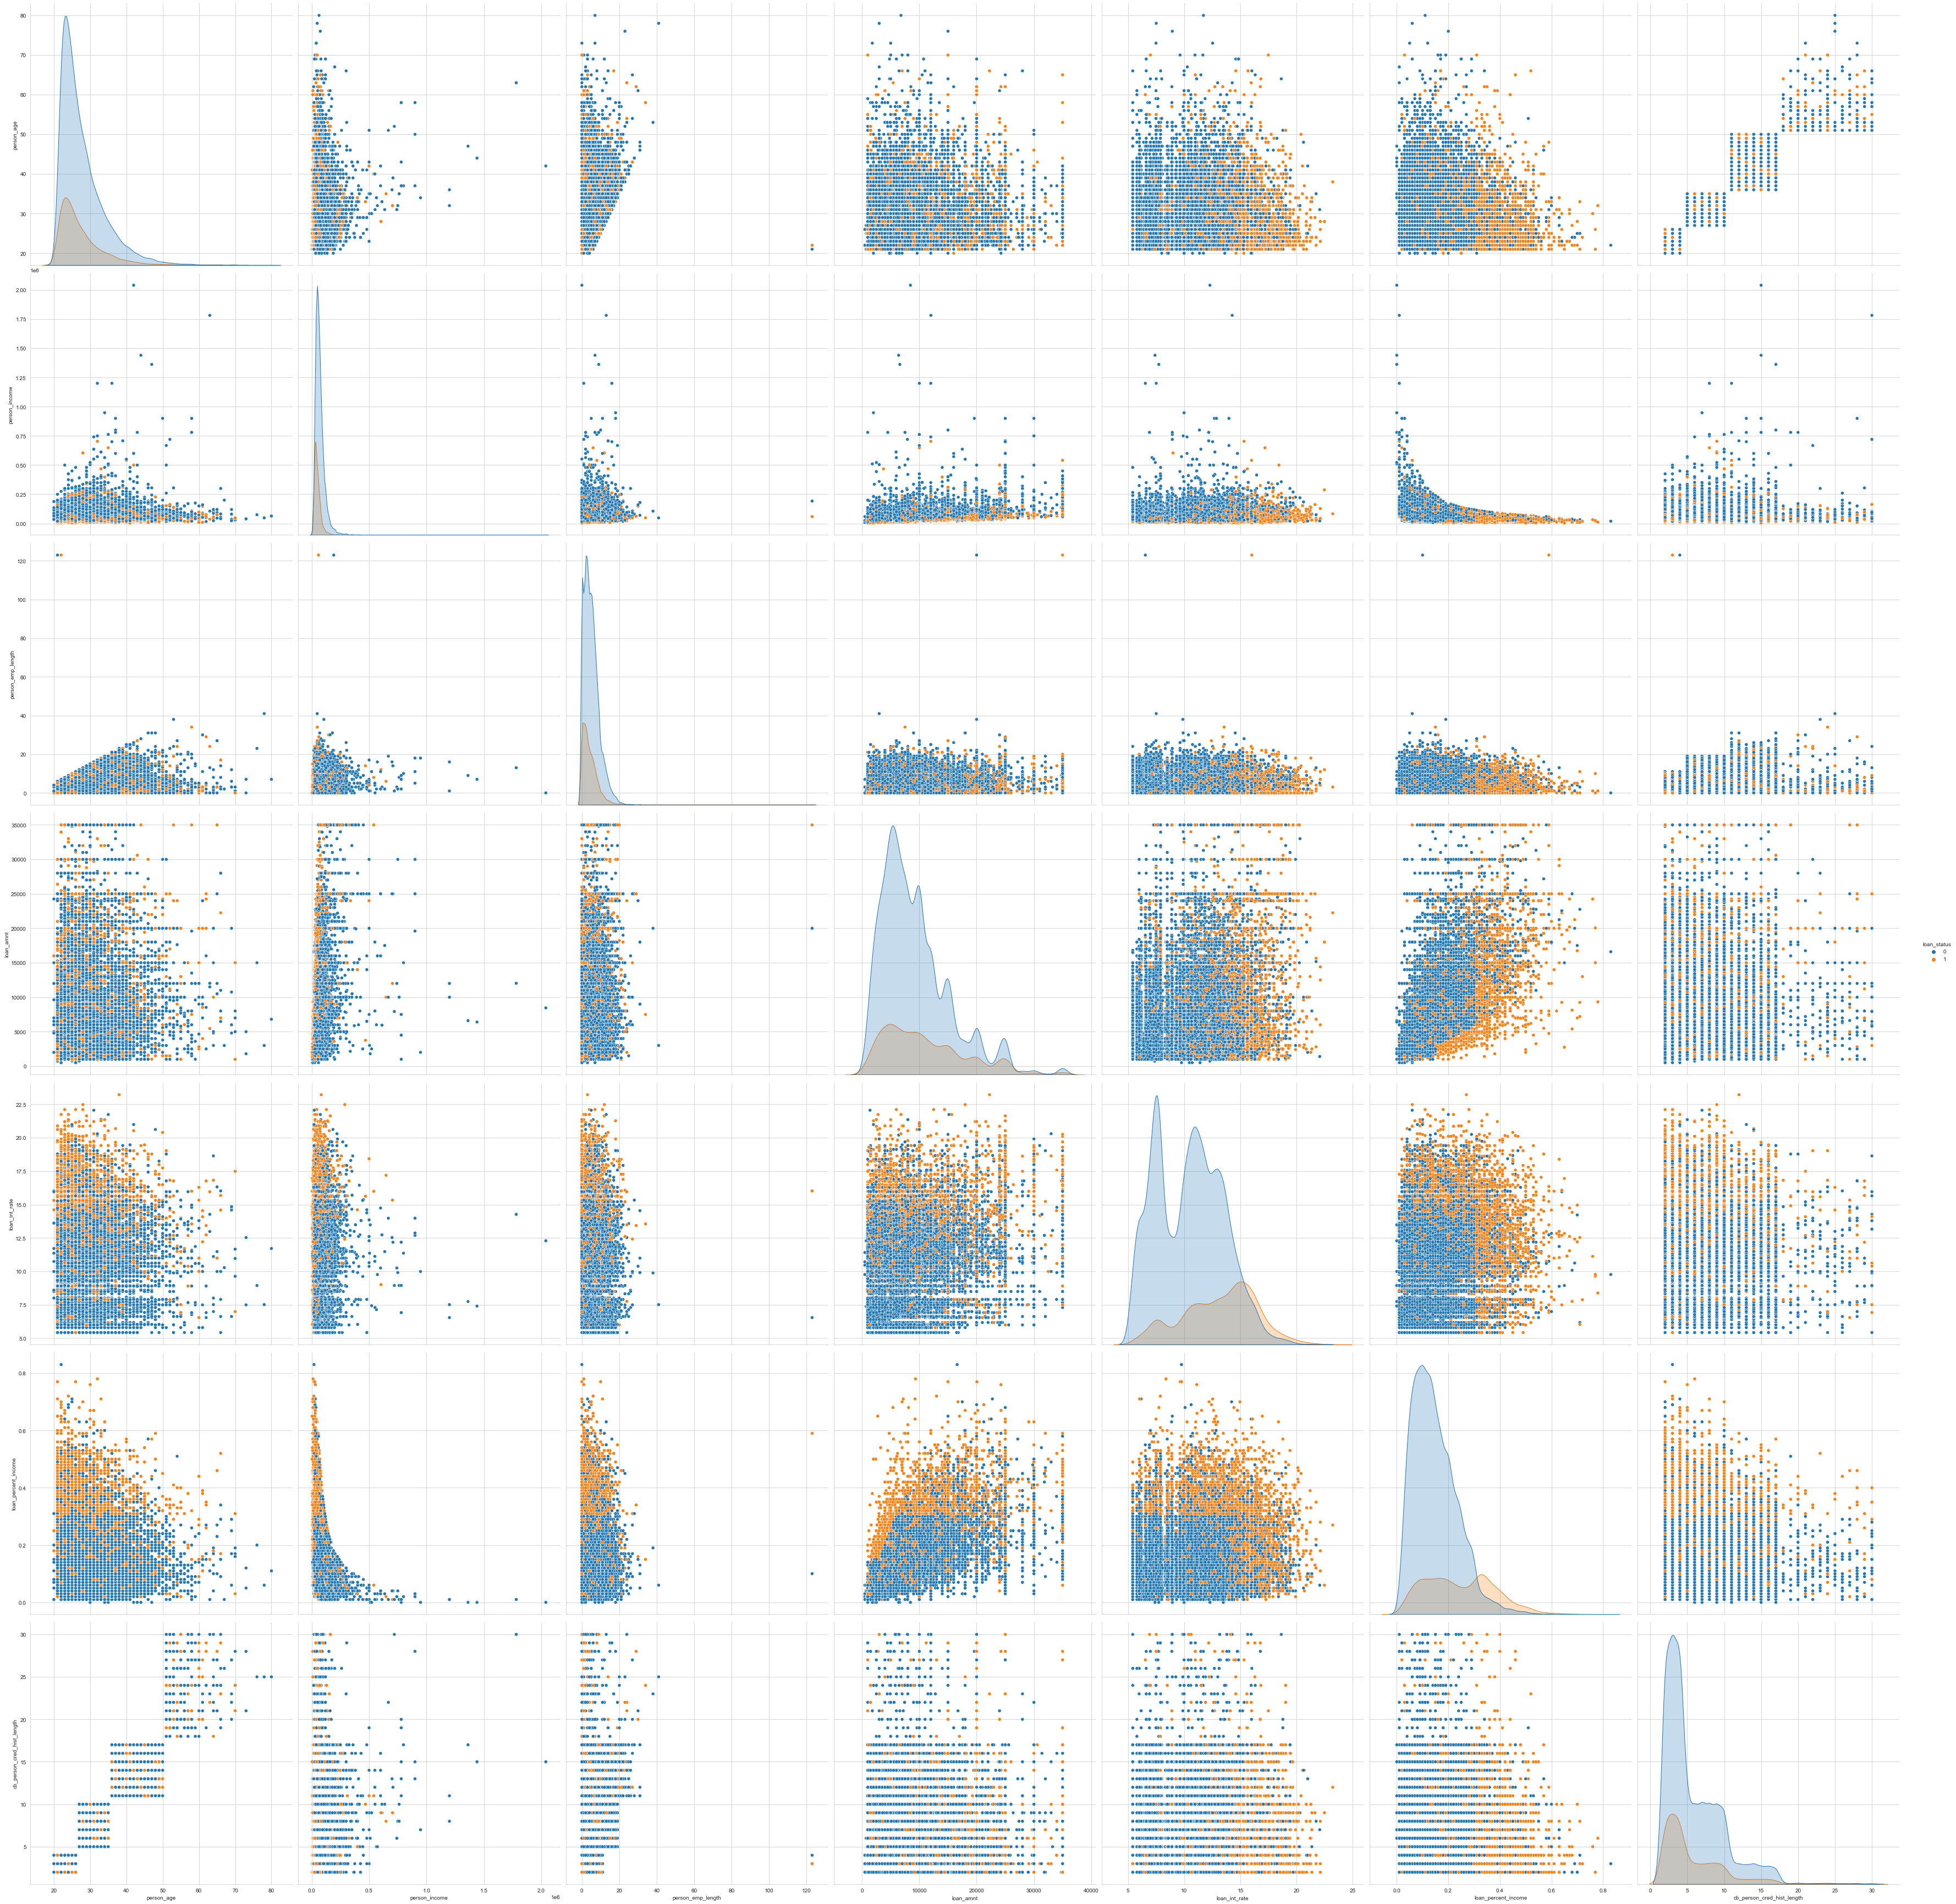

In [167]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(credit_df, hue="loan_status",
             vars=['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income',
        'cb_person_cred_hist_length'], size = 7)

## UNIVARIATE ANALYSIS

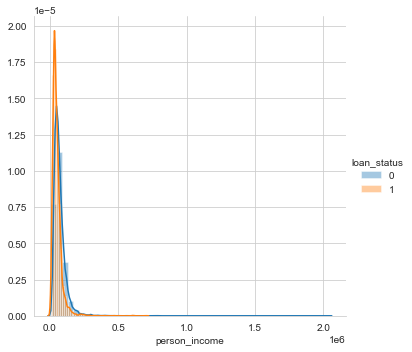

In [168]:
sns.FacetGrid(credit_df, hue="loan_status", size=5) \
   .map(sns.distplot, "person_income") \
   .add_legend();
plt.show();

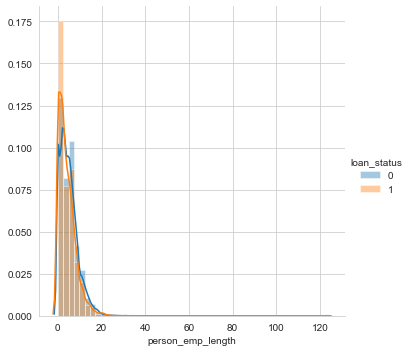

In [169]:
sns.FacetGrid(credit_df, hue="loan_status", size=5) \
   .map(sns.distplot, "person_emp_length") \
   .add_legend();
plt.show();

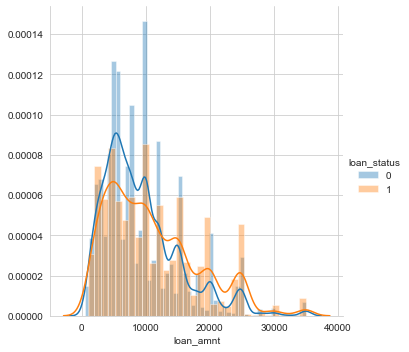

In [170]:
sns.FacetGrid(credit_df, hue="loan_status", size=5) \
   .map(sns.distplot, "loan_amnt") \
   .add_legend();
plt.show();

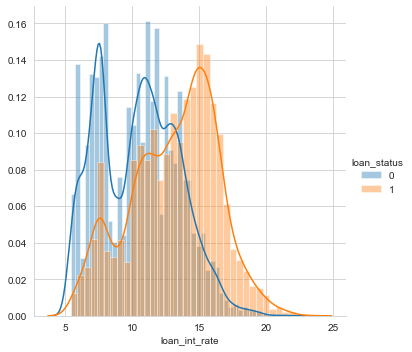

In [171]:
sns.FacetGrid(credit_df, hue="loan_status", size=5) \
   .map(sns.distplot, "loan_int_rate") \
   .add_legend();
plt.show();

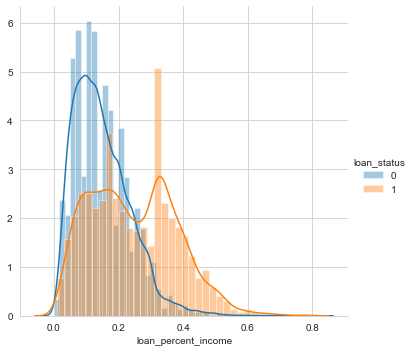

In [172]:
sns.FacetGrid(credit_df, hue="loan_status", size=5) \
   .map(sns.distplot, "loan_percent_income") \
   .add_legend();
plt.show();

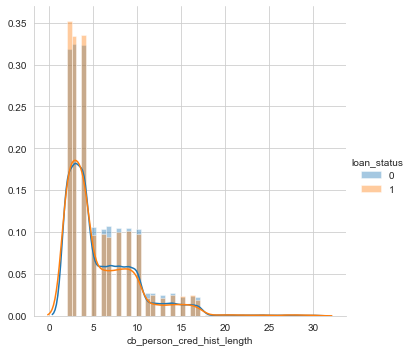

In [173]:
sns.FacetGrid(credit_df, hue="loan_status", size=5) \
   .map(sns.distplot, "cb_person_cred_hist_length") \
   .add_legend();
plt.show();

##  CDF 

In [174]:
good = credit_df.loc[credit_df["loan_status"]==0]
bad = credit_df.loc[credit_df["loan_status"] == 1]

In [175]:
good = good.drop('index', axis=1)
bad = bad.drop('index', axis=1)

In [176]:
good.head()

person_age  person_income person_home_ownership  person_emp_length  \
1           21           9600                   OWN                5.0   
14          23         115000                  RENT                2.0   
15          23         500000              MORTGAGE                7.0   
16          23         120000                  RENT                0.0   
20          25         162500                  RENT                2.0   

          loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
1           EDUCATION          B       1000          11.14            0   
14          EDUCATION          A      35000           7.90            0   
15  DEBTCONSOLIDATION          B      30000          10.65            0   
16          EDUCATION          A      35000           7.90            0   
20            VENTURE          A      35000           7.49            0   

    loan_percent_income cb_person_default_on_file  cb_person_cred_hist_length  
1                  0.10                         N                           2  
14                 0.30                         N                           4  
15                 0.06                         N                           3  
16                 0.29                         N                           4  
20                 0.22                         N                           4

[4.63530985e-01 3.29736959e-01 1.31341953e-01 4.84618814e-02
 1.71645118e-02 5.88497548e-03 2.36290682e-03 9.36246099e-04
 4.45831476e-04 1.33749443e-04]
[20. 26. 32. 38. 44. 50. 56. 62. 68. 74. 80.]


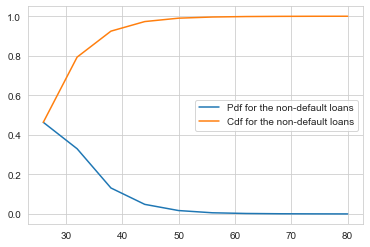

In [177]:
counts, bin_edges = np.histogram(good['person_age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.legend(['Pdf for the non-default loans',
            'Cdf for the non-default loans'])
plt.show()

[9.86045475e-01 1.13687026e-02 1.47124387e-03 6.68747214e-04
 1.78332590e-04 8.91662951e-05 4.45831476e-05 4.45831476e-05
 4.45831476e-05 4.45831476e-05]
[   7200.   210458.4  413716.8  616975.2  820233.6 1023492.  1226750.4
 1430008.8 1633267.2 1836525.6 2039784. ]


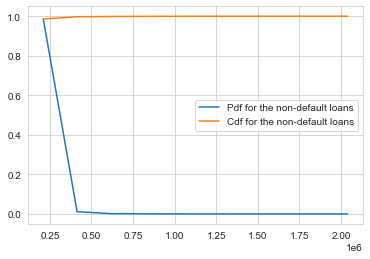

In [178]:
counts, bin_edges = np.histogram(good['person_income'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.legend(['Pdf for the non-default loans',
            'Cdf for the non-default loans'])
plt.show()

[9.45073562e-01 5.37672760e-02 1.02541239e-03 8.91662951e-05
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 4.45831476e-05]
[  0.   12.3  24.6  36.9  49.2  61.5  73.8  86.1  98.4 110.7 123. ]


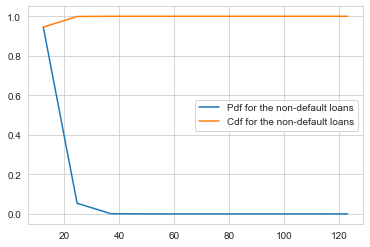

In [179]:
counts, bin_edges = np.histogram(good['person_emp_length'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.legend(['Pdf for the non-default loans',
            'Cdf for the non-default loans'])
plt.show()

[0.15644226 0.30436915 0.23303611 0.12122158 0.08279091 0.05296478
 0.01756576 0.0232724  0.00307624 0.00526081]
[  500.  3950.  7400. 10850. 14300. 17750. 21200. 24650. 28100. 31550.
 35000.]


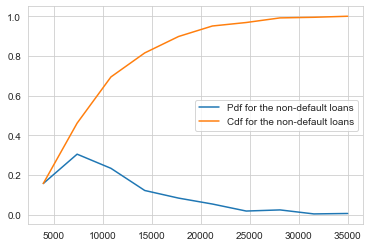

In [180]:
counts, bin_edges = np.histogram(good['loan_amnt'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.legend(['Pdf for the non-default loans',
            'Cdf for the non-default loans'])
plt.show()

[0.14650022 0.19139545 0.14774855 0.20468123 0.16758805 0.09612127
 0.03446277 0.00833705 0.00285332 0.00031208]
[ 5.42   7.084  8.748 10.412 12.076 13.74  15.404 17.068 18.732 20.396
 22.06 ]


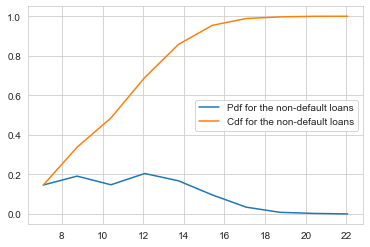

In [181]:
counts, bin_edges = np.histogram(good['loan_int_rate'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.legend(['Pdf for the non-default loans',
            'Cdf for the non-default loans'])
plt.show()

[2.64244316e-01 3.65938475e-01 2.33437361e-01 1.06999554e-01
 1.97949175e-02 6.77663843e-03 2.09540794e-03 4.90414623e-04
 1.78332590e-04 4.45831476e-05]
[0.    0.083 0.166 0.249 0.332 0.415 0.498 0.581 0.664 0.747 0.83 ]


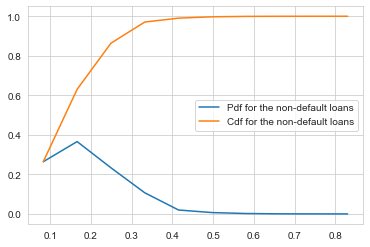

In [182]:
counts, bin_edges = np.histogram(good['loan_percent_income'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.legend(['Pdf for the non-default loans',
            'Cdf for the non-default loans'])
plt.show()

[0.54110566 0.17717343 0.17507802 0.04404815 0.02844405 0.02648239
 0.00209541 0.00227374 0.00169416 0.00160499]
[ 2.   4.8  7.6 10.4 13.2 16.  18.8 21.6 24.4 27.2 30. ]


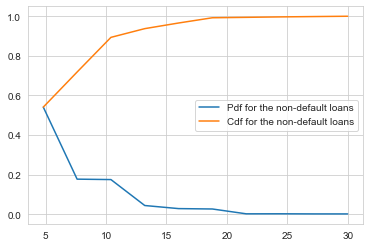

In [183]:
counts, bin_edges = np.histogram(good['cb_person_cred_hist_length'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.legend(['Pdf for the non-default loans',
            'Cdf for the non-default loans'])
plt.show()

## Mean, Variance and Std-dev

In [184]:
good.describe()

person_age  person_income  person_emp_length     loan_amnt  \
count  22430.000000   2.243000e+04       22430.000000  22430.000000   
mean      27.782345   7.095816e+04           4.969238   9278.582256   
std        6.147667   5.405041e+04           4.135899   6025.510415   
min       20.000000   7.200000e+03           0.000000    500.000000   
25%       23.000000   4.250400e+04           2.000000   5000.000000   
50%       26.000000   6.000000e+04           4.000000   8000.000000   
75%       30.000000   8.500000e+04           7.000000  12000.000000   
max       80.000000   2.039784e+06         123.000000  35000.000000   

       loan_int_rate  loan_status  loan_percent_income  \
count   22430.000000      22430.0         22430.000000   
mean       10.463476          0.0             0.148262   
std         2.972809          0.0             0.086574   
min         5.420000          0.0             0.000000   
25%         7.740000          0.0             0.080000   
50%        10.620000          0.0             0.130000   
75%        12.690000          0.0             0.200000   
max        22.060000          0.0             0.830000   

       cb_person_cred_hist_length  
count                22430.000000  
mean                     5.825724  
std                      4.020677  
min                      2.000000  
25%                      3.000000  
50%                      4.000000  
75%                      8.000000  
max                     30.000000

In [185]:
bad.describe()

person_age  person_income  person_emp_length     loan_amnt  \
count  6203.000000    6203.000000        6203.000000   6203.000000   
mean     27.447203   50054.547477           4.135741  11023.351604   
std       6.212141   36896.713589           4.157371   7161.100407   
min      20.000000    4000.000000           0.000000    900.000000   
25%      23.000000   30000.000000           1.000000   5000.000000   
50%      26.000000   42000.000000           3.000000  10000.000000   
75%      30.000000   60000.000000           6.000000  15000.000000   
max      70.000000  703800.000000         123.000000  35000.000000   

       loan_int_rate  loan_status  loan_percent_income  \
count    6203.000000       6203.0          6203.000000   
mean       13.123975          1.0             0.246311   
std         3.262529          0.0             0.132724   
min         5.420000          1.0             0.010000   
25%        10.910000          1.0             0.140000   
50%        13.490000          1.0             0.240000   
75%        15.580000          1.0             0.340000   
max        23.220000          1.0             0.780000   

       cb_person_cred_hist_length  
count                 6203.000000  
mean                     5.673545  
std                      4.087560  
min                      2.000000  
25%                      3.000000  
50%                      4.000000  
75%                      8.000000  
max                     30.000000

## Median, Percentile, Quantile, IQR, MAD

In [186]:
#Median, Quantiles, Percentiles, IQR.
print("\nMedians:")
print(np.median(good["person_age"]))
#Median with an outlier
print(np.median(np.append(good["person_age"],50)));
print(np.median(bad["person_age"]))

print("\nQuantiles:")
print(np.percentile(good["person_age"],np.arange(0, 100, 25)))
print(np.percentile(bad["person_age"],np.arange(0, 100, 25)))

print("\n90th Percentiles:")
print(np.percentile(good["person_age"],90))
print(np.percentile(bad["person_age"],90))

from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(good["person_age"]))
print(robust.mad(bad["person_age"]))


Medians:
26.0
26.0
26.0

Quantiles:
[20. 23. 26. 30.]
[20. 23. 26. 30.]

90th Percentiles:
36.0
35.0

Median Absolute Deviation
4.447806655516806
4.447806655516806


In [187]:
#Median, Quantiles, Percentiles, IQR.
print("\nMedians:")
print(np.median(good["person_income"]))
#Median with an outlier
print(np.median(np.append(good["person_income"],50)));
print(np.median(bad["person_income"]))

print("\nQuantiles:")
print(np.percentile(good["person_income"],np.arange(0, 100, 25)))
print(np.percentile(bad["person_income"],np.arange(0, 100, 25)))

print("\n90th Percentiles:")
print(np.percentile(good["person_income"],90))
print(np.percentile(bad["person_income"],90))

from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(good["person_income"]))
print(robust.mad(bad["person_income"]))


Medians:
60000.0
60000.0
42000.0

Quantiles:
[ 7200. 42504. 60000. 85000.]
[ 4000. 30000. 42000. 60000.]

90th Percentiles:
120000.0
83000.0

Median Absolute Deviation
29652.04437011204
20756.431059078426


Form "90th Percentiles" we can observe that person with low personal income has higher chances of declaring default.

In [188]:
#Median, Quantiles, Percentiles, IQR.
print("\nMedians:")
print(np.median(good["person_emp_length"]))
#Median with an outlier
print(np.median(np.append(good["person_emp_length"],50)));
print(np.median(bad["person_emp_length"]))

print("\nQuantiles:")
print(np.percentile(good["person_emp_length"],np.arange(0, 100, 25)))
print(np.percentile(bad["person_emp_length"],np.arange(0, 100, 25)))

print("\n90th Percentiles:")
print(np.percentile(good["person_emp_length"],90))
print(np.percentile(bad["person_emp_length"],90))

from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(good["person_emp_length"]))
print(robust.mad(bad["person_emp_length"]))


Medians:
4.0
4.0
3.0

Quantiles:
[0. 2. 4. 7.]
[0. 1. 3. 6.]

90th Percentiles:
10.0
9.0

Median Absolute Deviation
2.965204437011204
2.965204437011204


In [189]:
#Median, Quantiles, Percentiles, IQR.
print("\nMedians:")
print(np.median(good["loan_amnt"]))
#Median with an outlier
print(np.median(np.append(good["loan_amnt"],50)));
print(np.median(bad["loan_amnt"]))

print("\nQuantiles:")
print(np.percentile(good["loan_amnt"],np.arange(0, 100, 25)))
print(np.percentile(bad["loan_amnt"],np.arange(0, 100, 25)))

print("\n90th Percentiles:")
print(np.percentile(good["loan_amnt"],90))
print(np.percentile(bad["loan_amnt"],90))

from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(good["loan_amnt"]))
print(robust.mad(bad["loan_amnt"]))


Medians:
8000.0
8000.0
10000.0

Quantiles:
[  500.  5000.  8000. 12000.]
[  900.  5000. 10000. 15000.]

90th Percentiles:
18000.0
21500.0

Median Absolute Deviation
5189.107764769607
7413.01109252801


In [190]:
#Median, Quantiles, Percentiles, IQR.
print("\nMedians:")
print(np.median(good["loan_int_rate"]))
#Median with an outlier
print(np.median(np.append(good["loan_int_rate"],50)));
print(np.median(bad["loan_int_rate"]))

print("\nQuantiles:")
print(np.percentile(good["loan_int_rate"],np.arange(0, 100, 25)))
print(np.percentile(bad["loan_int_rate"],np.arange(0, 100, 25)))

print("\n90th Percentiles:")
print(np.percentile(good["loan_int_rate"],90))
print(np.percentile(bad["loan_int_rate"],90))

from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(good["loan_int_rate"]))
print(robust.mad(bad["loan_int_rate"]))


Medians:
10.62
10.62
13.49

Quantiles:
[ 5.42  7.74 10.62 12.69]
[ 5.42 10.91 13.49 15.58]

90th Percentiles:
14.27
16.82

Median Absolute Deviation
3.869591790299623
3.2765509028973816


Higher interest rate can also lead to higher chances of default.

In [191]:
#Median, Quantiles, Percentiles, IQR.
print("\nMedians:")
print(np.median(good["loan_percent_income"]))
#Median with an outlier
print(np.median(np.append(good["loan_percent_income"],50)));
print(np.median(bad["loan_percent_income"]))

print("\nQuantiles:")
print(np.percentile(good["loan_percent_income"],np.arange(0, 100, 25)))
print(np.percentile(bad["loan_percent_income"],np.arange(0, 100, 25)))

print("\n90th Percentiles:")
print(np.percentile(good["loan_percent_income"],90))
print(np.percentile(bad["loan_percent_income"],90))

from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(good["loan_percent_income"]))
print(robust.mad(bad["loan_percent_income"]))


Medians:
0.13
0.13
0.24

Quantiles:
[0.   0.08 0.13 0.2 ]
[0.01 0.14 0.24 0.34]

90th Percentiles:
0.26
0.42

Median Absolute Deviation
0.08895613311033611
0.14826022185056023


In [192]:
#Median, Quantiles, Percentiles, IQR.
print("\nMedians:")
print(np.median(good["cb_person_cred_hist_length"]))
#Median with an outlier
print(np.median(np.append(good["cb_person_cred_hist_length"],50)));
print(np.median(bad["cb_person_cred_hist_length"]))

print("\nQuantiles:")
print(np.percentile(good["cb_person_cred_hist_length"],np.arange(0, 100, 25)))
print(np.percentile(bad["cb_person_cred_hist_length"],np.arange(0, 100, 25)))

print("\n90th Percentiles:")
print(np.percentile(good["cb_person_cred_hist_length"],90))
print(np.percentile(bad["cb_person_cred_hist_length"],90))

from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(good["cb_person_cred_hist_length"]))
print(robust.mad(bad["cb_person_cred_hist_length"]))


Medians:
4.0
4.0
4.0

Quantiles:
[2. 3. 4. 8.]
[2. 3. 4. 8.]

90th Percentiles:
11.0
10.0

Median Absolute Deviation
2.965204437011204
2.965204437011204


## Box plot and Whiskers

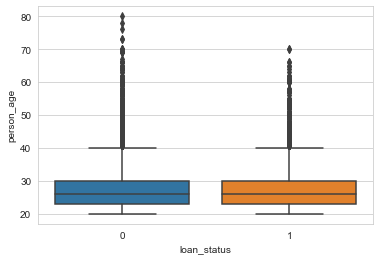

In [193]:
"""
Box plot takes a less space and visually represents the five number summary of the data points in a box. 
The outliers are displayed as points outside the box.
1. Q1 - 1.5*IQR
2. Q1 (25th percentile)
3. Q2 (50th percentile or median)
4. Q3 (75th percentile)
5. Q3 + 1.5*IQR
Inter Quartile Range = Q3 -Q1
'person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'
"""

sns.boxplot(x='loan_status',y='person_age', data=credit_df)
plt.show()

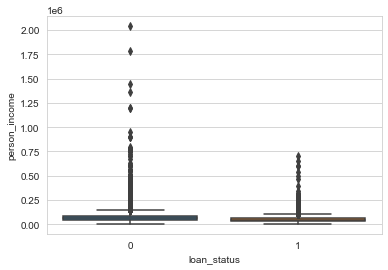

In [194]:
sns.boxplot(x='loan_status',y='person_income', data=credit_df)
plt.show()

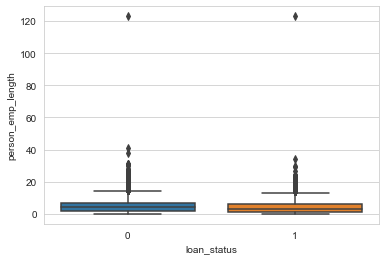

In [195]:
sns.boxplot(x='loan_status',y='person_emp_length', data=credit_df)
plt.show()

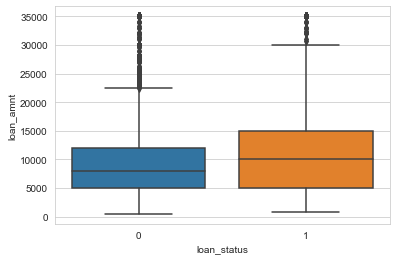

In [196]:
sns.boxplot(x='loan_status',y='loan_amnt', data=credit_df)
plt.show()

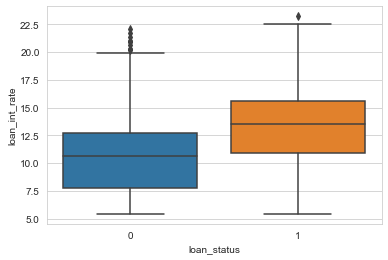

In [197]:
sns.boxplot(x='loan_status',y='loan_int_rate', data=credit_df)
plt.show()

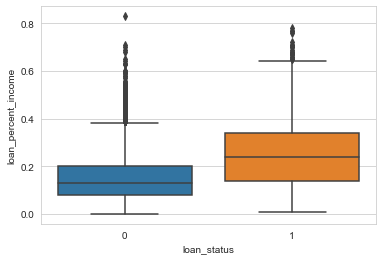

In [198]:
sns.boxplot(x='loan_status',y='loan_percent_income', data=credit_df)
plt.show()

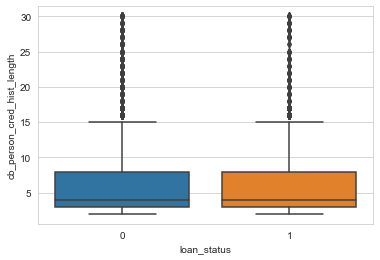

In [199]:
sns.boxplot(x='loan_status',y='cb_person_cred_hist_length', data=credit_df)
plt.show()

## Violin plots

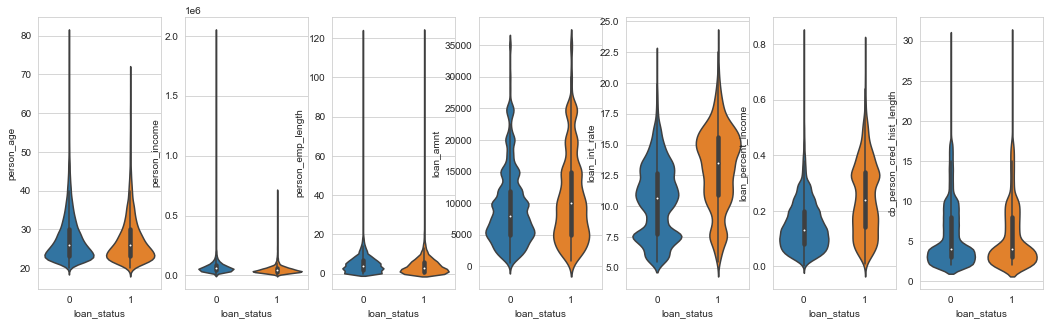

In [200]:
#Violin plot is the combination of box plot and probability density function.
#Denser regions of the data are fatter, and sparser ones thinner in a violin plot.

fig, axes = plt.subplots(1, 7, figsize=(18, 5))
for idx, feature in enumerate(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']):
    
    sns.violinplot( x='loan_status', y=feature, data=credit_df, ax=axes[idx])
plt.show()

## Contour plot 

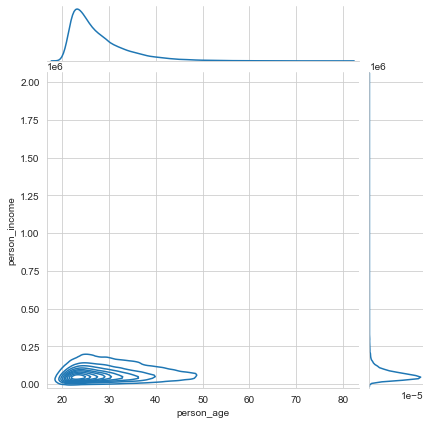

In [201]:
sns.jointplot(x="person_age", y="person_income", data=credit_df, kind="kde");
plt.show()

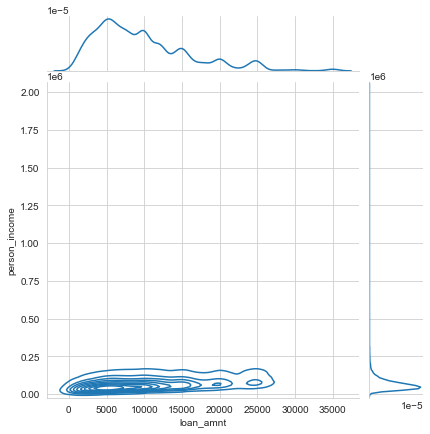

In [202]:
sns.jointplot(x="loan_amnt", y="person_income", data=credit_df, kind="kde");
plt.show()

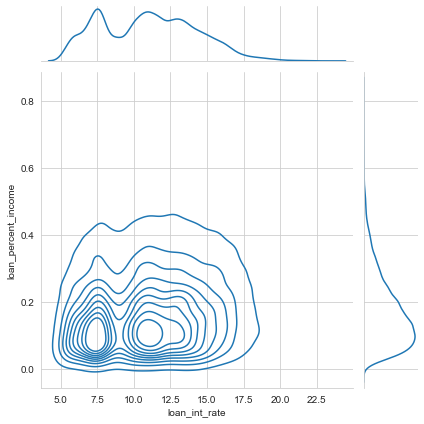

In [203]:
sns.jointplot(x="loan_int_rate", y="loan_percent_income", data=credit_df, kind="kde");
plt.show()

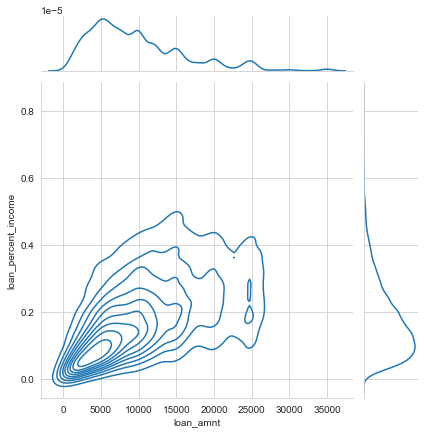

In [204]:
sns.jointplot(x="loan_amnt", y="loan_percent_income", data=credit_df, kind="kde");
plt.show()